In [2]:
from latools import *
from sympy import *
init_printing(use_latex=True)

# Linear Independence

## First strategy:

To determine if the vectors $\mathbf{v}_1$, $\mathbf{v}_2$, ..., $\mathbf{v}_k$ are linearly independent we proceed as follows:

- Solve the linear system:
$$
c_1\mathbf{v}_1+c_2\mathbf{v}_2+\cdots+c_k\mathbf{v}_k=\mathbf{0}
$$
- If the only solution of the system is $c_1=c_2=\cdots c_k=0$, the vectors are linearly independent. Otherwise, they are linearly dependent.

## Example 1

Determine if the vectors:
$$
\mathbf{v}_1=\begin{bmatrix} 1\\ -2\\ 3\\ 3\end{bmatrix},\quad
\mathbf{v}_2=\begin{bmatrix} 0\\ 2\\ -4\\ 1\end{bmatrix},\quad
\mathbf{v}_3=\begin{bmatrix} 1\\ 1\\ -3\\ 2\end{bmatrix}
$$

### Solution:

We write the system:
$$
c_1\begin{bmatrix} 1\\ -2\\ 3\\ 3\end{bmatrix}+
c_2\begin{bmatrix} 0\\ 2\\ -4\\ 1\end{bmatrix}+
c_3\begin{bmatrix} 1\\ 1\\ -3\\ 2\end{bmatrix}=
\begin{bmatrix}0\\0\\0\\0\end{bmatrix}
$$
Equivalently:
$$
\begin{bmatrix}1&0&1\\-2&2&1\\3&-4&-3\\3&1&2\end{bmatrix}
\begin{bmatrix}c_1\\c_2\\c_3\end{bmatrix}=
\begin{bmatrix}0\\0\\0\\0\end{bmatrix}
$$
Since this is a homogeneous system, we don't need to keep track of the right-hand side vector, so we work with the matrix $A$ itself, instead of the augmented matrix:

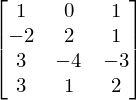

In [3]:
A = matrix_to_rational([[ 1,  0,  1],
                        [-2,  2,  1],
                        [ 3, -4, -3],
                        [ 3,  1,  2]])
A

We now use the function `reduced_row_echelon_form()` to find the RREF matrix equivalent to $A$:

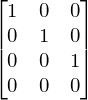

In [4]:
R = reduced_row_echelon_form(A)
R

The three columns in this matrix correspond to the variables $c_1$, $c_2$ and $c_3$ (remember, this is _not_ the augmented matrix). So, this matrix corresponds to the solution:
\begin{align*}
c_1&=0\\
c_2&=0\\
c_3&=0\\
\end{align*}
Notice that the last row consists only of zeros, and can be ignored.

We conclude that, the only solution to:
$$
c_1\mathbf{v}_1+c_2\mathbf{v}_2+c_3\mathbf{v}_3=\mathbf{0}
$$
is
$$
c_1=0,\quad c_2=0,\quad c_3=0
$$
It follows that the vectors are _linearly independent_.

## Example 2

Determine if the vectors:
$$
\mathbf{v}_1=\begin{bmatrix} -1\\ 2\\ 0\\ 3\end{bmatrix},\quad
\mathbf{v}_2=\begin{bmatrix} 0\\ 1\\ 2\\ 4\end{bmatrix},\quad
\mathbf{v}_3=\begin{bmatrix} 1\\ 2\\ 1\\ 3\end{bmatrix},\quad
\mathbf{v}_4=\begin{bmatrix} 2\\ 9\\ -2\\ -6\end{bmatrix}
$$
are linearly independent.

### Solution:
We need to solve the linear system:
$$
c_1\begin{bmatrix} -1\\ 2\\ 0\\ 3\end{bmatrix}+
c_2\begin{bmatrix} 0\\ 1\\ 2\\ 4\end{bmatrix}+
c_3\begin{bmatrix} 1\\ 2\\ 1\\ 3\end{bmatrix}+
c_4\begin{bmatrix} 2\\ 9\\ -2\\ -6\end{bmatrix}=
\begin{bmatrix}0\\0\\0\\0\end{bmatrix}
$$
In matrix form:
$$
\begin{bmatrix}-1&0&1&2\\2&1&2&9\\0&2&1&-2\\3&4&3&6\end{bmatrix}
\begin{bmatrix}c_1\\c_2\\c_3\\c_4\end{bmatrix}=
\begin{bmatrix}0\\0\\0\\0\end{bmatrix}
$$
The matrix of the system is (ignoring the right-hand side, since the system is homogeneous):

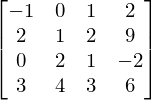

In [5]:
A = matrix_to_rational([[-1, 0, 1,  2],
                        [ 2, 1, 2,  9],
                        [ 0, 2, 1, -2],
                        [ 3, 4, 3,  6]])
A

The RREF equivalent matrix is:

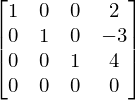

In [6]:
R = reduced_row_echelon_form(A)
R

Thus, the original system is equivalent to:
\begin{align*}
c_1+2c_4&=0\\
c_2-3c_4&=0\\
c_3+4c_4&=0
\end{align*}
Since there are free variables, this system has infinitely many solutions. For example, we can let $c_4=1$, so that $c_1=-2$, $c_2=3$ and $c_3=-4$, and we get the relation:
$$
-2\textbf{v}_1+3\textbf{v}_2-4\textbf{v}_3+\textbf{v}_4=\textbf{0}
$$
We conclude that the vectors are _linearly dependent_.

Notice that, from the formula above, we can express any of the vectors that appears with a nonzero coefficient in terms of the other. For example:
$$
-4\textbf{v}_3=2\textbf{v}_1-3\textbf{v}_2-\textbf{v}_4
$$
Thus:
$$
\textbf{v}_3=-\frac{1}{2}\textbf{v}_1-\frac{3}{4}\textbf{v}_2+\frac{1}{4}\textbf{v}_4
$$
So, if we remove the vector $\textbf{v}_3$ from the set, we are removing a "dependency", and we may ask if the set of remaining vectors:
$$
\mathbf{v}_1=\begin{bmatrix} -1\\ 2\\ 0\\ 3\end{bmatrix},\quad
\mathbf{v}_2=\begin{bmatrix} 0\\ 1\\ 2\\ 4\end{bmatrix},\quad
\mathbf{v}_4=\begin{bmatrix} 2\\ 9\\ -2\\ -6\end{bmatrix}
$$
is linearly independent. Again, we can use this using the definition of linear independence and some algebra. We need to solve the system:
$$
c_1\begin{bmatrix} -1\\ 2\\ 0\\ 3\end{bmatrix}+
c_2\begin{bmatrix} 0\\ 1\\ 2\\ 4\end{bmatrix}+
c_3\begin{bmatrix} 2\\ 9\\ -2\\ -6\end{bmatrix}=
\begin{bmatrix}0\\0\\0\\0\end{bmatrix}
$$
In matrix form:
$$
\begin{bmatrix}-1&0&2\\2&1&9\\0&2&-2\\3&4&6\end{bmatrix}
\begin{bmatrix}c_1\\c_2\\c_3\end{bmatrix}=
\begin{bmatrix}0\\0\\0\\0\end{bmatrix}
$$
The solution to the system is as follows:

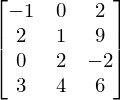

In [7]:
A = matrix_to_rational([[-1, 0,  2],
                        [ 2, 1,  9],
                        [ 0, 2, -2],
                        [ 3, 4,  6]])
A

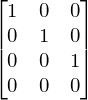

In [8]:
R = reduced_row_echelon_form(A)
R

The system now only has the trivial solution, $c_1=0$, $c_2=0$ $c_3=0$. We conclude that $\mathbf{v}_1$,  $\mathbf{v}_2$ and  $\mathbf{v}_4$ are _linearly independent_.

The next example demonstrates a streamlined method to obtain a linearly independent subset from a given set of vectors.

## Example 3

Find a subset of $\{\mathbf{v}_1,\mathbf{v}_2,\mathbf{v}_3,\mathbf{v}_4,\mathbf{v}_5\}$ that is linearly independent, where:
$$
\mathbf{v}_1=\left[\begin{matrix}1\\-2\\0\\-3\\-6\end{matrix}\right],\quad
\mathbf{v}_2=\left[\begin{matrix}-2\\4\\0\\6\\12\end{matrix}\right],\quad
\mathbf{v}_3=\left[\begin{matrix}2\\-3\\1\\-2\\-5\end{matrix}\right],\quad
\mathbf{v}_4=\left[\begin{matrix}7\\-11\\3\\-9\\-21\end{matrix}\right],\quad
\mathbf{v}_5=\left[\begin{matrix}-2\\2\\-1\\0\\1\end{matrix}\right]
$$

_Solution_:

We first solve the system:
$$
c_1\mathbf{v}_1+c_2\mathbf{v}_2+c_3\mathbf{v}_3+c_4\mathbf{v}_4+c_5\mathbf{v}_5=\mathbf{0}
$$
In matrix form this becomes:
$$
\left[\begin{matrix}1 & -2 & 2 & 7 & -2\\-2 & 4 & -3 & -11 & 2\\0 & 0 & 1 & 3 & -1\\-3 & 6 & -2 & -9 & 0\\-6 & 12 & -5 & -21 & 1\end{matrix}\right]
\begin{bmatrix}c_1\\c_2\\c_3\\c_4\\c_5\end{bmatrix}=
\begin{bmatrix}0\\0\\0\\0\\0\end{bmatrix}
$$
The solution is in the following cells:

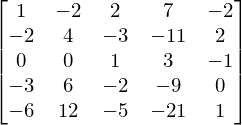

In [9]:
A = matrix_to_rational([[ 1, -2,  2,   7, -2],
                        [-2,  4, -3, -11,  2],
                        [ 0,  0,  1,   3, -1],
                        [-3,  6, -2,  -9,  0],
                        [-6, 12, -5, -21,  1]])
A

The RREF is:

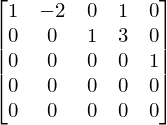

In [10]:
R = reduced_row_echelon_form(A)
R

The original system is equivalent to:
\begin{align*}
c_1-2c_2+c_4&=0\\
c_3+3c_4&=0\\
c_5&=0
\end{align*}
The free variables are $c_2$ and $c_4$, and the privot variables are $c_1$, $c_3$ and $c_5$.

Now, notice that _if we set the free variables equal to $0$, then the pivot variables will also be zero_. This means that the only solution of:
$$
c_1\mathbf{v}_1+c_3\mathbf{v}_3+c_5\mathbf{v}_5=\mathbf{0}
$$
is $c_1=c_3=c_5=0$, and the vectors $\mathbf{v}_1$, $\mathbf{v}_3$, $\mathbf{v}_5$ are linearly independent. In fact, this is a _maximal_ linearly independent subset of the given vectors, because the solution of the system above shows that $v_2$ and $v_4$ can be expressed in terms of $v_1$, $v_3$, $v_5$.

This principle can be used in general to solve this kind of problem:

Suppose that a finite set of vectors $\{\mathbf{v}_1,\mathbf{v}_2,\ldots,\mathbf{v}_k\}$, and we want to find a _maximal linearly independent subset_ of this set. Proceed as follows:

- Let $A$ be the matrix that has the given vectors in its columns: $A=\begin{bmatrix}\mathbf{v}_1&\mathbf{v}_2&\ldots&\mathbf{v}_k\end{bmatrix}$

- Find the RREF of $A$.

- A minimal set of linearly independent vectors is formed by the vectors that correspond to the _pivot columns_ of the RREF.

## Example 4

Find a subset of the vectors that is maximally linearly independent:
$$
\mathbf{v}_1=\begin{bmatrix} 2\\ 4\\ -1\end{bmatrix},\quad
\mathbf{v}_2=\begin{bmatrix} 4\\ -8\\ 2\end{bmatrix},\quad
\mathbf{v}_3=\begin{bmatrix} 0\\ 2\\ 0\end{bmatrix},\quad
\mathbf{v}_4=\begin{bmatrix} 2\\ 6\\ -1\end{bmatrix},\quad
$$

_Solution_:

Form a matrix with the vectors on its columns:

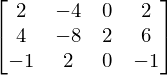

In [11]:
A = matrix_to_rational([[ 2,  -4, 0,  2],
                        [ 4,  -8, 2,  6],
                        [-1,   2, 0, -1]])
A

Find the RREF equivalent matrix:

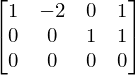

In [12]:
R = reduced_row_echelon_form(A)
R

Columns 1 and 3 are pivot columns, so a maximal linearly independent set is given by:
$$
\mathbf{v}_1=\begin{bmatrix} 2\\ 4\\ -1\end{bmatrix},\quad
\mathbf{v}_3=\begin{bmatrix} 0\\ 2\\ 0\end{bmatrix},\quad
$$